<h1>Цифровой прорыв — 2021. ФИНАЛ // Кейс Hyper AdTech</h1>
<h2>Решение по определению цифрового портрета аудитории в мобильной среде</h2>
___________________________________________________________________

`Big Data`  `Data Science`

<h3>Команда DST-OFF<span class=\"tocSkip\"></span></h3>

# Постановка задачи
Рекламная платформа Hyper AdTech, специализирующаяся на размещении видеорекламы в мобильных приложениях, поставила задачу создать решение, которое позволило бы максимально точно определить профиль аудитории в  мобильной среде на основе различных косвенных и исторических аудиторных данных.

Для решения кейса вам доступны модельные данные. Данные состоят из:
* Сегментов целевых аудиторий — они параметризуются социально-демографическими атрибутами и/или тематическими интересами Истории активности пользователей в мобильных приложениях — это идентификатор приложения, время и географическая локация 
* Панелистов — каждый панелист принадлежит хотя бы одному сегменту, а действия панелиста размечены в истории активности его сегментами 
* Идентификаторов мобильных устройств, пользователей и панелистов в модельных данных нет. 

Ваша задача — разметить историю активности так, чтобы проставить везде недостающие сегменты.

В рамках кейса  необходимо решить следующие задачи:
1. Обучить классификатор предсказывать сегмент по признакам на тренировочной выборке и проверить работу классификатора на тестовой выборке, в которой отсутствуют метки сегментов;
2. Используя таблицу признаков, кластеризовать пользователей и сравнить найденные кластеры с сегментами, представленными в Dataset.

## Требования к результату
Программное решение, которое
1. на входе получает набор проверочных данных, и
2. выводит таблицу охвата (доля сегмента, или же вероятность получить сегмент в трафике).

Результат по первой задаче:
* Алгоритм, который на входе получает информацию о признаках трафика (категория приложения, время и местоположение пользователя) и на выходе определяет сегменты, к которым принадлежат пользователи
Результат нужно представить в виде таблицы с двумя колонками, где первая колонка - это соответствующий номер записи, а вторая колонка - это предсказанный сегмент.

Результат по второй задаче:
* Алгоритм, который на входе получает аналогичную п.1 информацию о признаках трафика, и выводит:
   * процентное отношение количества каждого определенного вами кластера. Кроме того необходимо обосновать полученный результат, то есть описать признаки трафика, который принадлежит выделенному вами кластеру. По возможности также нужно обосновать результат; если это предполагает выбранный вами алгоритм, то дополнительно выявленными вами признаками принадлежности к кластеру. 
   
Требование к презентации результата:
* Представить процент охвата по сегментам. Для этого нужно посчитать какой процент каждый из типов предсказанных сегментов занимает по отношению ко всей тестовой выборке. 

Поправка:
* Для кластеризации нужен массив размера (n x 5) (с вероятностями классов, n - размер тестовой выборки)
* Таблица по % охватам нужна для задачи кластеризации, её следует привести в презентации вашего решения

# Описание решения
## Подход команды к решению задачи

* ...
* ...
* ...

Ход решения представлен ниже.

In [1]:
#!c1.8
%pip install -U pip icecream seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#!c1.8
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from icecream import ic

In [3]:
#!c1.8
ic()
df = pd.read_csv('train.csv.zip')
ic()

ic| <ipython-input-50-3bf864640db9>:1 in <module> at 00:23:02.622
ic| <ipython-input-50-3bf864640db9>:3 in <module> at 00:24:27.977


In [4]:
#!c1.8
ic()
display(df.info(null_counts=True))
ic()

ic| <ipython-input-51-bd9baf3193f4>:1 in <module> at 00:27:56.452


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44854516 entries, 0 to 44854515
Data columns (total 10 columns):
Segment            44854516 non-null int64
gamecategory       27893185 non-null object
subgamecategory    27886091 non-null object
bundle             44837232 non-null object
created            44854516 non-null object
shift              41263366 non-null object
oblast             41399238 non-null object
city               40054524 non-null object
os                 44854283 non-null object
osv                44854233 non-null object
dtypes: int64(1), object(9)
memory usage: 3.3+ GB


None

ic| <ipython-input-51-bd9baf3193f4>:3 in <module> at 00:28:10.324


In [5]:
#!c1.8
ic()
display(df.describe(include='all'))
ic()

ic| <ipython-input-52-83fcf1c675ca>:1 in <module> at 00:30:03.603


,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
count,44854516.0,27893185,27886091,44837232,44854516,41263366,41399238,40054524,44854283,44854233
unique,nan,27,53,85797,1720033,11,90,2498,4,254
top,nan,Games,Puzzle,com.fugo.wow,1970-01-01 03:00:00,MSK,Москва,Москва,android,10.0
freq,nan,24555534,4691498,1678124,233,26308751,7680369,7644426,35245849,9447724
mean,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ic| <ipython-input-52-83fcf1c675ca>:3 in <module> at 00:31:13.555


In [6]:
#!c1.8
ic()
display(df[df.created=='1970-01-01 03:00:00'])
ic()

ic| <ipython-input-53-9407b76b7b3a>:1 in <module> at 00:31:14.321

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
444051,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
826581,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
835484,3,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
1329799,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2946205,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
44155424,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
44181051,5,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
44403110,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
44600146,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN



ic| <ipython-input-53-9407b76b7b3a>:3 in <module> at 00:31:16.684


In [7]:
#!c1.8
ic()
display(df.nunique())
ic()

ic| <ipython-input-54-89f46983e4b9>:1 in <module> at 00:31:17.523


Segment                  5
gamecategory            27
subgamecategory         53
bundle               85797
created            1720033
shift                   11
oblast                  90
city                  2498
os                       4
osv                    254
dtype: int64

ic| <ipython-input-54-89f46983e4b9>:3 in <module> at 00:32:04.781


In [12]:
#!c1.8
ic()
display(df.Segment.value_counts(normalize=True)*100)
ic()

ic| <ipython-input-59-447a37df7334>:1 in <module> at 00:35:00.775


5   38.3
3   31.6
4   24.8
2    3.2
1    2.1
Name: Segment, dtype: float64

ic| <ipython-input-59-447a37df7334>:3 in <module> at 00:35:01.115


In [16]:
#!c1.8
ic()
display(df.gamecategory.value_counts())
ic()

ic| <ipython-input-63-c889fb4ae3ee>:1 in <module> at 00:38:50.624


Games                 24555534
Applications           2742231
Lifestyle               267292
Shopping                184875
Entertainment            31465
Social Networking        28931
Education                27008
Book                     23483
Photo & Video            10235
Utilities                 7560
Music                     4571
IAB9-30                   3474
Health & Fitness          1423
Finance                   1322
Productivity              1314
Travel                     778
Sports                     614
Navigation                 332
Reference                  235
IAB9,IAB9-30,games         226
Graphics & Design           73
Business                    67
Medical                     66
Food & Drink                44
News                        23
Weather                      5
Stickers                     4
Name: gamecategory, dtype: int64

ic| <ipython-input-63-c889fb4ae3ee>:3 in <module> at 00:38:53.755


In [17]:
#!c1.8
ic()
display(df.subgamecategory.value_counts())
ic()

ic| <ipython-input-64-0412fedf0cc9>:1 in <module> at 00:39:03.883

Puzzle                     4691498
Action                     3412940
Casual                     3242897
Simulation                 2757136
Word                       1827741
Arcade                     1372731
Strategy                   1276408
Role Playing               1202308
Card                       1041830
Board                       883606
Racing                      812515
Adventure                   736299
Tools                       666860
None                        647453
Sports                      576169
Dating                      296753
Shopping                    287733
Music                       286998
Productivity                222971
Entertainment               218854
Books & Reference           211505
Health & Fitness            176483
Video Players & Editors     151221
Casino                      149003
Trivia                      134411
Music & Audio               115483
Education                    86473
Family                       77440
Social              


ic| <ipython-input-64-0412fedf0cc9>:3 in <module> at 00:39:07.104


In [25]:
#!c1.8
ic()
display(df.bundle.value_counts()[df.bundle.value_counts()>5000])
ic()

ic| <ipython-input-72-0d23ab9ebb75>:1 in <module> at 00:52:29.498


com.fugo.wow                                       1678124
net.wargaming.wot.blitz                            1101717
com.openmygame.games.android.wordpizza              902581
com.axlebolt.standoff2                              632030
com.yourstoryinteractive.sails.pirate.adventure     491705
                                                    ...   
com.creativejoy.fruitwonderland                       5042
Draziw.Button.Mines                                   5035
com.codigames.idle.fitness.gym.tycoon                 5033
1560113405                                            5015
com.gramgames.mergemagic                              5002
Name: bundle, Length: 1219, dtype: int64

ic| <ipython-input-72-0d23ab9ebb75>:3 in <module> at 00:52:41.394


In [111]:
#!c1.8
ic()
df['date'] = pd.to_datetime(df.created).dt.date
df['month'] = pd.to_datetime(df.created).dt.month
topgames = df.bundle.value_counts()[:20].index
df_topgames = df[df.bundle.isin(topgames)]
ic()
len(df_topgames)

ic| <ipython-input-28-b406279698e4>:1 in <module> at 03:40:41.992
ic| <ipython-input-28-b406279698e4>:6 in <module> at 03:41:46.136


9466545

In [33]:
#!c1.8
ic()
tdf = df_topgames.groupby(by=['bundle', 'date']).date.count().unstack().fillna(0)
ic()
display(tdf/tdf.sum()*100)

ic| <ipython-input-80-7b539f7efc1b>:1 in <module> at 01:00:30.870
ic| <ipython-input-80-7b539f7efc1b>:3 in <module> at 01:00:32.977


date,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20
bundle,,,,,,,,,,,,,,,,,,,,
1300588558,5.2,4.9,5.3,4.4,4.5,5.1,4.5,1.3,1.6,1.6,2.2,2.1,1.7,2.3,2.8,2.7,2.6,3.0,2.7,3.1
351331194,3.0,3.2,3.7,3.4,4.2,5.0,4.7,1.5,1.7,1.7,2.4,2.3,1.9,2.7,3.1,3.0,2.7,2.9,3.4,3.5
com.Seriously.BestFiends,1.4,1.4,1.5,1.8,2.5,2.5,2.5,1.9,2.1,2.1,1.8,1.6,2.0,1.9,2.4,2.8,2.7,2.8,3.0,3.0
com.allgoritm.youla,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.2,10.7,11.1,11.5,13.2
com.axlebolt.standoff2,4.0,3.9,4.2,5.4,5.7,6.0,5.8,11.8,12.8,12.8,9.7,8.5,10.4,9.6,0.6,1.3,0.6,0.3,0.1,0.2
com.fidgettrading.game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,3.2,3.5,4.1,4.9,6.0,5.4,1.1,1.1,1.4,1.3,1.3,0.9
com.fingerlab.word.blockpuzzles,1.9,1.7,2.2,2.7,3.1,3.0,3.4,4.2,4.0,4.1,4.3,5.0,5.0,4.7,4.9,4.4,3.0,2.4,2.8,2.7
com.fugo.wow,33.4,34.9,31.3,39.8,35.3,29.1,30.2,12.1,12.6,12.5,11.8,11.4,13.2,13.7,9.3,10.1,10.3,10.5,11.3,11.2
com.iposedon.bricksbreakerballs,7.6,7.4,6.0,0.5,0.6,0.7,0.6,5.0,3.9,3.4,3.6,3.8,3.1,3.1,2.1,2.2,2.2,2.0,1.3,2.3


In [88]:
#!c1.8
ic()
topsubgamecategory = df.subgamecategory.value_counts()[:25].index
df_topsubgamecategory = df[df.subgamecategory.isin(topsubgamecategory)]
tdf = df_topsubgamecategory.groupby(by=['subgamecategory', 'date']).date.count().unstack().fillna(0)
ic()
tdf['Итого'] = tdf.sum(axis=1)
tdf.sort_values('Итого', ascending=False, inplace=True)
ic()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.1f}'.format
display(tdf/tdf.sum()*100)

ic| <ipython-input-5-0d6ca08f9fc9>:1 in <module> at 03:03:46.125
ic| <ipython-input-5-0d6ca08f9fc9>:5 in <module> at 03:03:59.967
ic| <ipython-input-5-0d6ca08f9fc9>:8 in <module> at 03:03:59.989


date,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,Итого
subgamecategory,,,,,,,,,,,,,,,,,,,,,
Puzzle,16.6,16.8,17.3,16.9,17.2,17.2,17.3,17.4,17.2,17.1,17.7,17.7,17.5,17.6,17.3,17.5,16.9,16.4,17.1,17.5,17.2
Action,11.7,11.5,11.4,11.7,11.5,11.8,12.4,15.1,14.6,14.6,14.0,14.0,14.4,14.3,10.3,10.1,10.6,11.4,11.1,10.0,12.5
Casual,12.0,12.3,12.9,12.8,12.8,12.7,12.7,11.8,12.0,12.0,11.7,12.1,12.6,12.5,10.9,10.9,11.5,11.8,11.9,11.0,11.9
Simulation,12.3,11.7,11.7,11.5,11.7,11.8,11.5,8.9,9.0,9.0,9.1,9.3,9.4,9.5,10.0,9.8,10.6,11.2,10.8,9.9,10.1
Word,5.8,5.9,5.6,6.0,6.1,6.0,6.0,7.1,7.2,7.2,7.1,6.8,7.0,7.0,6.7,7.0,6.6,6.2,6.5,6.8,6.7
Arcade,5.1,5.1,4.9,5.5,5.4,5.4,5.3,5.1,5.1,5.1,4.6,4.8,5.5,5.1,4.9,4.6,4.9,5.1,5.0,4.4,5.0
Strategy,4.7,4.7,4.6,4.7,4.8,4.7,4.6,5.0,4.9,5.0,5.1,4.5,4.3,4.3,4.9,4.6,4.4,4.3,4.2,4.7,4.7
Role Playing,6.6,6.4,6.3,5.4,5.3,5.3,5.2,3.9,4.0,4.2,4.2,4.3,3.8,3.9,4.3,4.3,4.1,4.1,4.0,4.2,4.4
Card,3.2,3.3,3.3,3.3,3.3,3.2,3.3,3.6,3.7,3.7,3.8,3.6,3.3,3.4,4.7,4.7,4.4,4.0,4.0,4.5,3.8


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


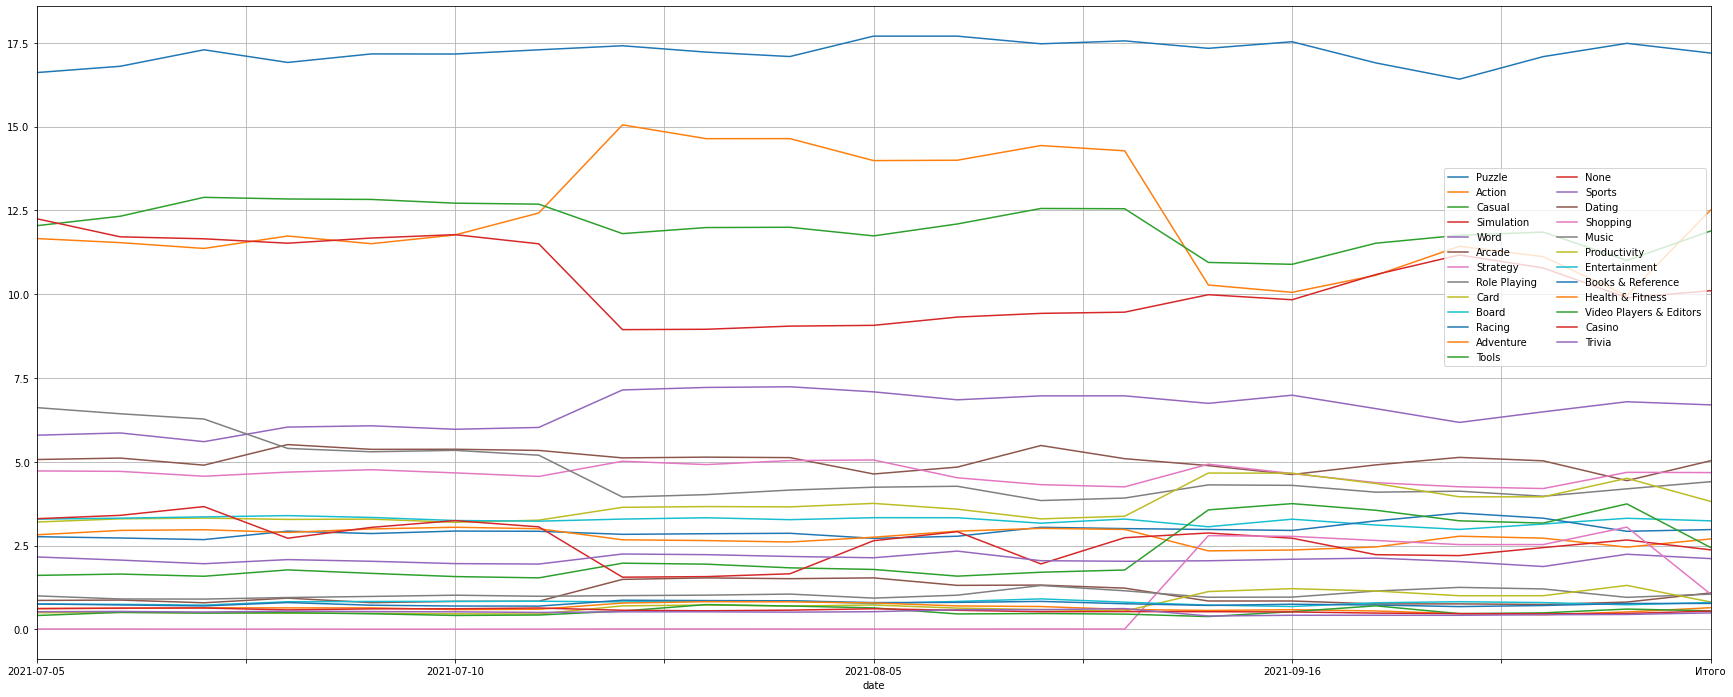

In [87]:
#!c1.8
display((tdf/tdf.sum()*100).T.plot(grid=True, figsize=(30,12)).legend(loc='right', bbox_to_anchor=(1, 0.6), ncol=2))

In [89]:
#!c1.8
ic()
topoblast = df.oblast.value_counts()[:25].index
df_topoblast = df[df.oblast.isin(topoblast)]
tdf = df_topoblast.groupby(by=['oblast', 'date']).date.count().unstack().fillna(0)
ic()
tdf['Итого'] = tdf.sum(axis=1)
tdf.sort_values('Итого', ascending=False, inplace=True)
ic()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.1f}'.format
display(tdf/tdf.sum()*100)

ic| <ipython-input-6-22f55a547495>:1 in <module> at 03:07:26.987
ic| <ipython-input-6-22f55a547495>:5 in <module> at 03:07:44.683
ic| <ipython-input-6-22f55a547495>:8 in <module> at 03:07:44.706


date,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,Итого
oblast,,,,,,,,,,,,,,,,,,,,,
Москва,23.7,24.3,24.7,24.9,24.4,23.2,22.6,22.2,22.3,22.2,23.0,23.0,21.6,21.4,23.1,22.5,22.3,21.4,22.6,23.1,22.7
Свердловская область,9.5,9.3,8.9,8.9,9.3,9.6,9.5,8.8,8.8,8.9,9.0,8.9,9.0,9.3,9.3,9.6,9.4,9.2,8.8,9.2,9.1
Санкт-Петербург,9.1,9.2,9.3,9.6,9.8,9.5,9.3,9.5,9.1,8.9,9.0,9.0,9.0,8.4,9.3,8.8,8.8,8.7,9.0,8.8,9.1
Краснодарский край,10.3,9.8,10.1,10.1,10.0,10.1,9.8,9.0,9.1,9.1,8.9,9.0,9.4,9.1,7.9,7.8,7.7,7.6,8.0,7.8,8.9
Татарстан,5.8,5.7,5.6,5.9,5.9,6.0,5.9,6.7,6.8,6.9,6.7,6.7,6.9,6.7,7.3,7.1,7.1,6.9,6.7,6.9,6.6
Новосибирская область,5.5,5.8,5.5,5.2,5.5,5.7,5.9,4.7,4.6,4.8,4.8,4.8,4.6,4.9,4.8,5.0,4.9,5.2,4.9,5.3,5.0
Самарская область,4.8,4.9,4.8,5.1,5.0,5.0,5.0,4.7,4.8,4.7,4.6,4.6,4.8,4.7,4.6,4.6,4.6,4.5,4.3,4.4,4.7
Ростовская область,3.1,3.0,3.0,2.9,3.0,3.0,3.0,3.5,3.5,3.5,3.4,3.4,3.5,3.4,3.1,3.0,3.0,3.1,3.2,3.0,3.2
Московская область,2.9,2.9,3.1,2.9,2.9,2.9,2.9,2.7,2.6,2.7,2.9,3.0,3.0,2.9,2.9,2.9,3.1,3.3,3.6,3.1,2.9


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


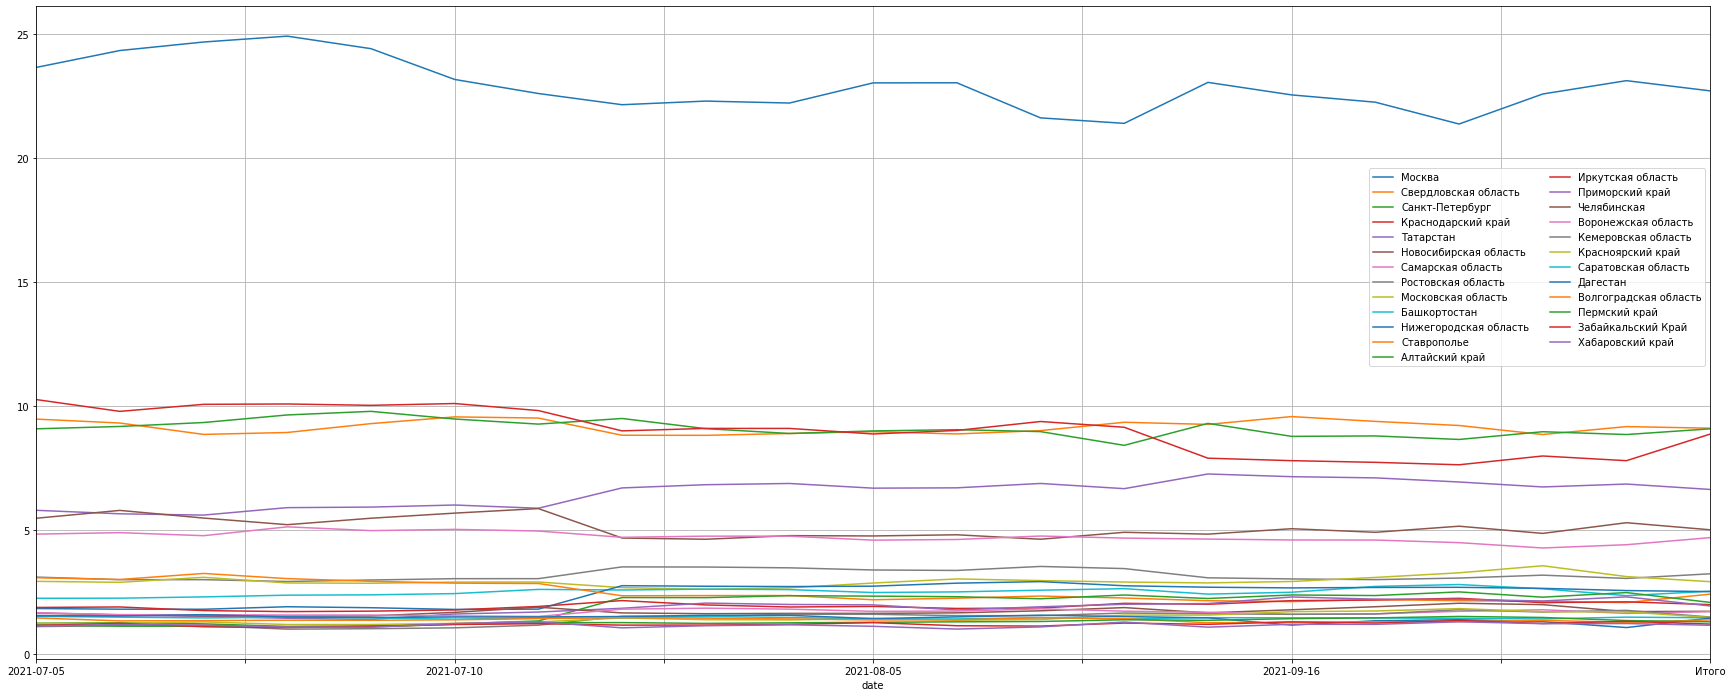

In [90]:
#!c1.8
display((tdf/tdf.sum()*100).T.plot(grid=True, figsize=(30,12)).legend(loc='right', bbox_to_anchor=(1, 0.6), ncol=2))

In [175]:
#!c1.8
ic()
topoblast = df.oblast.value_counts()[:25].index
df_topoblast = df[df.oblast.isin(topoblast)]
tdf = df_topoblast.groupby(by=['Segment', 'oblast']).date.count().unstack().fillna(0)
ic()
tdf.sort_values(5, ascending=False, axis=1, inplace=True)
tdf['Итого'] = tdf.sum(axis=1)
ic()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.1f}'.format
display((tdf/tdf.sum()*100).T)

ic| <ipython-input-2-e17b1b2e10f3>:1 in <module> at 08:52:35.692
ic| <ipython-input-2-e17b1b2e10f3>:5 in <module> at 08:54:51.943
ic| <ipython-input-2-e17b1b2e10f3>:8 in <module> at 08:54:51.964


Segment,1,2,3,4,5
oblast,,,,,
Москва,2.0,2.8,33.2,24.4,37.6
,2.3,3.3,30.1,25.4,38.9
Свердловская область,2.1,3.4,31.2,24.9,38.4
Санкт-Петербург,2.0,2.8,32.9,24.7,37.6
Краснодарский край,2.2,2.6,33.6,25.4,36.1
Татарстан,1.9,3.3,30.9,24.9,39.0
Новосибирская область,2.2,3.4,30.8,24.2,39.4
Самарская область,2.1,3.1,31.7,26.1,36.9
Ростовская область,1.9,3.0,31.8,25.6,37.8


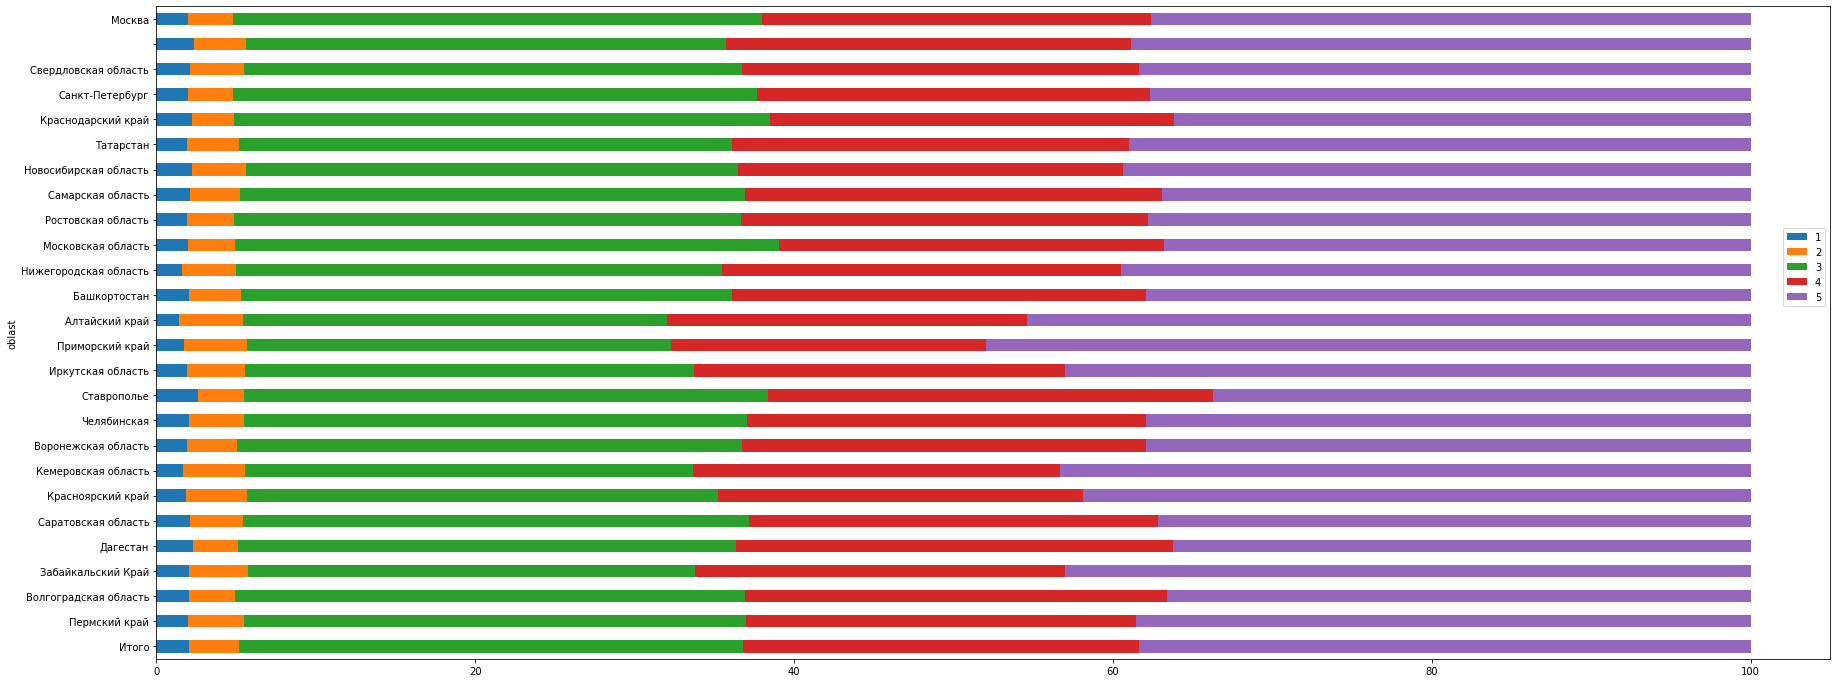

In [176]:
#!c1.8
display((tdf/tdf.sum()*100).T[::-1].plot.barh(stacked=True, figsize=(30,12)).legend(loc='right', bbox_to_anchor=(1, 0.6)))

In [122]:
#!c1.8
ic()
topoblast = df.oblast.value_counts()[:25].index
df_topoblast = df[df.oblast.isin(topoblast)]
tdf = df_topoblast.groupby(by=['month', 'Segment', 'oblast']).date.count().unstack().fillna(0)
ic()
tdf.sort_values((9, 5), ascending=False, axis=1, inplace=True)
tdf['Итого'] = tdf.sum(axis=1)
ic()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.1f}'.format
display((tdf/tdf.sum(level=0)*100).T)

ic| <ipython-input-39-d10e4b3e38a6>:1 in <module> at 04:02:25.684
ic| <ipython-input-39-d10e4b3e38a6>:5 in <module> at 04:02:43.259
ic| <ipython-input-39-d10e4b3e38a6>:8 in <module> at 04:02:43.281


month                   7              8             9                    
Segment                 1    3    4    3    4    5   1    2    3    4    5
oblast                                                                    
Москва                6.5 57.0 36.5 24.4 27.5 48.2 1.3  8.6 27.3 11.6 51.2
Свердловская область  7.2 52.1 40.8 22.1 27.3 50.6 1.4 10.1 28.5 10.8 49.2
Санкт-Петербург       6.6 55.8 37.6 24.4 27.6 48.0 1.4  8.7 27.7 11.3 50.8
Краснодарский край    7.0 54.5 38.5 25.0 26.9 48.2 1.4  9.1 28.7 11.4 49.4
Татарстан             7.0 52.0 40.9 23.2 27.9 48.9 1.4  9.5 28.8 11.7 48.6
Новосибирская область 7.2 52.9 39.9 20.0 26.5 53.5 1.2 10.4 27.6  9.1 51.7
Самарская область     6.9 52.7 40.4 22.6 28.3 49.1 1.5  9.9 28.6 12.4 47.7
Московская область    6.5 59.9 33.6 25.7 28.5 45.8 1.4  8.3 27.5 13.1 49.7
Ростовская область    6.9 55.1 38.0 23.7 28.3 48.0 1.5  9.5 28.2 12.9 47.9
Нижегородская область 6.8 54.6 38.6 23.5 29.0 47.6 1.5  9.7 28.7 13.2 47.0
Приморский край       7.6 53.0 39.3 17.4 22.4 60.2 1.0 10.4 24.8  7.2 56.6
Алтайский край        7.3 52.9 39.7 19.1 27.1 53.8 1.3 10.5 27.1 10.7 50.5
Башкортостан          7.1 52.8 40.1 21.6 28.9 49.5 1.5  9.7 29.3 13.2 46.3
Иркутская область     7.4 52.8 39.7 17.9 26.2 55.9 1.1 10.3 26.4 10.0 52.2
Ставрополье           7.7 52.1 40.3 23.3 29.3 47.5 1.5  9.9 28.3 13.9 46.4
Челябинская           6.8 54.5 38.6 22.1 28.6 49.2 1.5  9.8 28.9 12.5 47.2
Красноярский край     7.0 55.0 38.0 19.7 27.3 53.0 1.3 10.0 27.8 10.5 50.4
Кемеровская область   7.2 54.1 38.7 19.3 27.2 53.5 1.4 10.4 27.5 10.8 50.1
Воронежская область   7.0 54.2 38.8 23.3 28.2 48.5 1.5  9.5 29.1 12.6 47.3
Саратовская область   7.0 54.0 39.0 22.7 28.4 48.9 1.6 10.0 28.5 12.6 47.3
Забайкальский Край    7.4 51.4 41.2 18.1 25.9 56.1 1.2 10.6 25.8  8.7 53.7
Хабаровский край      7.6 53.2 39.2 16.6 22.7 60.6 1.0 11.1 24.6  7.0 56.2
Пермский край         7.0 54.8 38.1 22.6 28.1 49.4 1.5  9.8 29.2 12.6 47.0
Волгоградская область 7.0 54.0 39.1 23.4 29.0 47.6 1.5  9.3 28.4 13.5 47.3
Дагестан              8.0 52.5 39.5 23.3 29.0 47.7 1.3  9.6 26.6 15.2 47.4
Итого                 6.9 54.6 38.5 22.9 27.5 49.6 1.4  9.4 27.9 11.5 49.9

In [ ]:
#!c1.8
ic()
topsubgamecategory = df.subgamecategory.value_counts()[:25].index
df_topsubgamecategory = df[df.subgamecategory.isin(topsubgamecategory)]
tdf = df_topsubgamecategory.groupby(by=['subgamecategory', 'date']).date.count().unstack().fillna(0)
tdf.sort_values((9, 5), ascending=False, axis=1, inplace=True)
tdf['Итого'] = tdf.sum(axis=1)
ic()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.1f}'.format
display((tdf/tdf.sum(level=0)*100).T)

In [124]:
#!c1.8
pd.set_option('display.max_rows', 10)
df[df.created=='1970-01-01 03:00:00']

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,date,month
444051,4,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
826581,4,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
835484,3,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
1329799,4,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
2946205,4,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44155424,4,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
44181051,5,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
44403110,4,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1
44600146,4,None,None,None,1970-01-01 03:00:00,None,None,None,None,None,1970-01-01,1


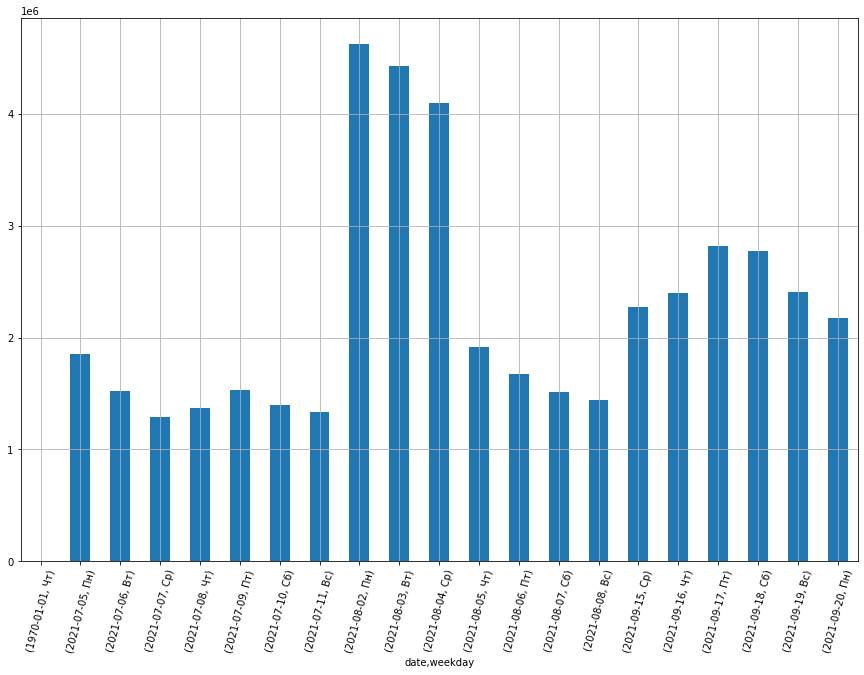

In [129]:
#!c1.8

# Выделим номер дня недели
df['weekdayid'] = pd.to_datetime(df.date).dt.weekday

# Для наглядности определим текстовую метку дня недели
df['weekday'] = df.weekdayid.map({0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Чт', 4: 'Пт', 5: 'Сб', 6: 'Вс'})
ax = df.groupby(by=['date', 'weekday']).date.count().plot(grid=True, kind='bar', figsize=(15, 10), rot=75)
# for x in range(df.date_time.min().weekday()%6,df.date.nunique()+1,7):
#     ax.axvspan(x-1.5, x+0.5, facecolor='grey', alpha=0.2)
plt.show()

In [130]:
#!c1.8
ic()
df_test = pd.read_csv('test.csv.zip')
ic()

ic| <ipython-input-47-cb1946112bea>:1 in <module> at 04:34:31.317
ic| <ipython-input-47-cb1946112bea>:3 in <module> at 04:34:54.631


In [131]:
#!c1.8
df_test

,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
0,Applications,Shopping,com.allgoritm.youla,2021-09-19 17:31:33,MSK+2,Свердловская область,Екатеринбург,android,10.0
1,NaN,NaN,com.ChocochocoStd.RapBattle,2021-08-03 17:13:17,MSK+2,Ямало-Ненецкий АО,Новый Уренгой,android,10.0
2,NaN,NaN,1387897651,2021-09-17 15:54:00,MSK,Москва,Москва,ios,14.4.0
3,NaN,NaN,com.cooking.family.diary.fever.food.city.craze...,2021-07-05 23:34:59,MSK,Краснодарский край,Краснодар,android,9.0.0
4,Applications,Health & Fitness,com.pedometer.stepcounter.tracker,2021-07-08 15:15:21,MSK,Татарстан,Набережные Челны,android,10.0
...,...,...,...,...,...,...,...,...,...
11213624,NaN,NaN,com.phonemaster.jewelhunter,2021-08-04 05:55:26,MSK,Санкт-Петербург,Санкт-Петербург,android,8.1.0
11213625,NaN,NaN,com.linkdesks.jewellegend,2021-09-17 21:45:02,MSK,Ставрополье,Пятигорск,android,10
11213626,Applications,Health & Fitness,com.pedometer.stepcounter.tracker,2021-07-08 10:24:31,MSK+6,Забайкальский Край,Чита,android,11.0
11213627,NaN,NaN,com.onebutton.mrsuper,2021-07-05 16:02:47,MSK+2,Башкортостан,Белорецк,android,6.0.1


ic| <ipython-input-53-bc1b3bac3a1a>:1 in <module> at 04:50:26.735
ic| <ipython-input-53-bc1b3bac3a1a>:4 in <module> at 04:50:34.467
ic| <ipython-input-53-bc1b3bac3a1a>:7 in <module> at 04:50:36.984


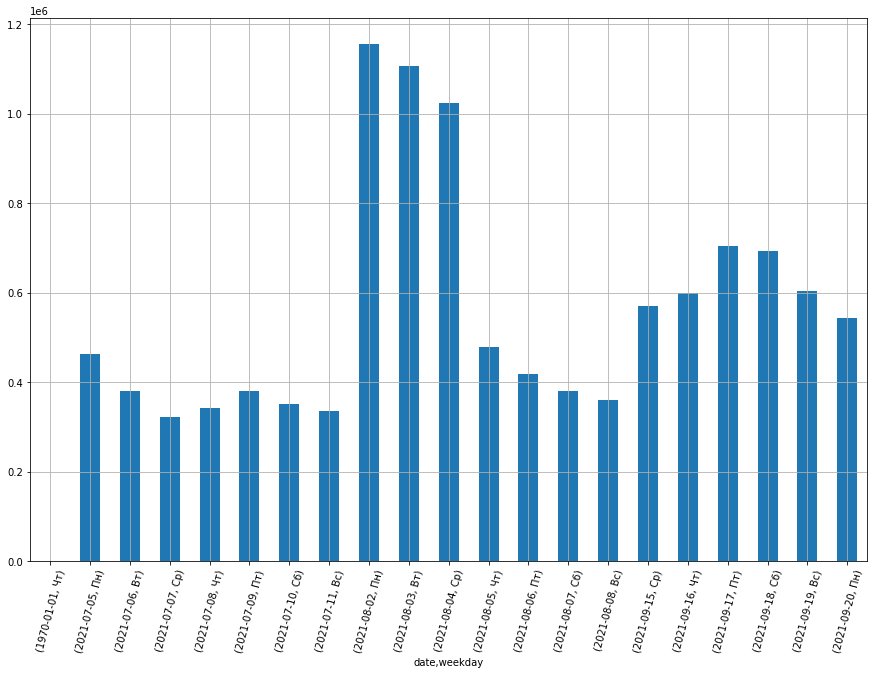

In [136]:
#!c1.8
ic()
df_test['date'] = pd.to_datetime(df_test.created).dt.date
df_test['month'] = pd.to_datetime(df_test.created).dt.month
ic()
# Выделим номер дня недели
df_test['weekdayid'] = pd.to_datetime(df_test.date).dt.weekday
ic()
# Для наглядности определим текстовую метку дня недели
df_test['weekday'] = df_test.weekdayid.map({0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Чт', 4: 'Пт', 5: 'Сб', 6: 'Вс'})
ax = df_test.groupby(by=['date', 'weekday']).date.count().plot(grid=True, kind='bar', figsize=(15, 10), rot=75)
# for x in range(df.date_time.min().weekday()%6,df.date.nunique()+1,7):
#     ax.axvspan(x-1.5, x+0.5, facecolor='grey', alpha=0.2)
plt.show()

In [141]:
#!c1.8
ic()
topoblast = df_test.oblast.value_counts()[:25].index
df_test_topoblast = df_test[df_test.oblast.isin(topoblast)]
tdf = df_test_topoblast.groupby(by=['oblast', 'date']).date.count().unstack().fillna(0)
ic()
tdf['Итого'] = tdf.sum(axis=1)
tdf.sort_values('Итого', ascending=False, inplace=True)
ic()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.1f}'.format
display(tdf/tdf.sum()*100)

ic| <ipython-input-58-96a783cc1717>:1 in <module> at 04:57:32.825
ic| <ipython-input-58-96a783cc1717>:5 in <module> at 04:57:37.419
ic| <ipython-input-58-96a783cc1717>:8 in <module> at 04:57:37.439


date,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,Итого
oblast,,,,,,,,,,,,,,,,,,,,,
Москва,23.6,24.3,24.8,25.0,24.6,23.3,22.7,22.2,22.3,22.2,23.1,23.2,21.5,21.4,23.0,22.4,22.2,21.4,22.5,23.1,22.7
Свердловская область,9.4,9.3,8.8,8.9,9.3,9.6,9.6,8.9,8.8,8.9,8.9,8.9,9.0,9.4,9.2,9.6,9.4,9.3,8.9,9.3,9.1
Санкт-Петербург,9.0,9.2,9.2,9.6,9.9,9.5,9.2,9.5,9.1,8.9,9.0,9.1,8.9,8.4,9.3,8.8,8.8,8.6,9.0,8.9,9.1
Краснодарский край,10.2,9.8,10.0,10.1,10.0,10.0,9.8,9.0,9.1,9.1,8.9,8.9,9.3,9.1,7.9,7.8,7.7,7.6,8.1,7.8,8.9
Татарстан,5.8,5.6,5.6,5.9,5.9,6.0,5.9,6.7,6.8,6.9,6.7,6.6,7.0,6.5,7.3,7.2,7.1,7.0,6.7,6.9,6.6
Новосибирская область,5.5,5.8,5.5,5.3,5.4,5.7,6.0,4.7,4.6,4.7,4.8,4.8,4.6,5.0,4.8,5.1,4.9,5.1,4.8,5.3,5.0
Самарская область,4.8,4.8,4.7,5.0,4.9,5.0,5.0,4.7,4.8,4.8,4.6,4.6,4.7,4.7,4.7,4.6,4.6,4.4,4.3,4.4,4.7
Ростовская область,3.1,3.0,3.0,2.9,3.0,3.0,3.0,3.5,3.5,3.5,3.4,3.4,3.6,3.5,3.1,3.0,3.0,3.1,3.2,3.1,3.2
Московская область,3.0,3.0,3.0,2.8,2.9,2.9,2.9,2.6,2.6,2.7,2.8,3.0,3.0,2.9,2.9,2.9,3.1,3.3,3.6,3.1,2.9


In [142]:
#!c1.8
ic()
topgames = df_test.bundle.value_counts()[:20].index
df_topgames = df_test[df_test.bundle.isin(topgames)]
ic()
len(df_topgames)

ic| <ipython-input-1-d96ebabad2f3>:1 in <module> at 05:59:31.204
ic| <ipython-input-1-d96ebabad2f3>:4 in <module> at 06:00:09.868


2364804

In [144]:
#!c1.8
ic()
tdf = df_topgames.groupby(by=['bundle', 'date']).date.count().unstack().fillna(0)
ic()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.1f}'.format
display(tdf/tdf.sum()*100)

ic| <ipython-input-3-24e687244ee2>:1 in <module> at 06:00:51.139
ic| <ipython-input-3-24e687244ee2>:3 in <module> at 06:00:51.561


date,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20
bundle,,,,,,,,,,,,,,,,,,,,
1300588558,5.2,4.9,5.2,4.4,4.6,5.1,4.4,1.3,1.6,1.6,2.2,2.2,1.7,2.4,2.8,2.7,2.6,2.9,2.8,3.0
351331194,3.0,3.2,3.8,3.4,4.2,5.0,4.8,1.5,1.7,1.7,2.3,2.4,2.0,2.7,3.2,3.0,2.7,2.8,3.4,3.5
com.Seriously.BestFiends,1.4,1.5,1.5,1.8,2.5,2.6,2.4,1.9,2.1,2.1,1.8,1.6,2.0,1.9,2.4,2.7,2.8,2.7,3.0,3.1
com.allgoritm.youla,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.4,10.6,11.2,11.4,13.0
com.axlebolt.standoff2,4.0,4.0,4.2,5.3,5.6,6.0,5.8,11.8,12.9,12.8,9.5,8.6,10.4,9.6,0.6,1.3,0.6,0.3,0.1,0.2
com.fidgettrading.game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.1,3.5,4.0,4.9,6.1,5.3,1.1,1.1,1.4,1.3,1.3,0.9
com.fingerlab.word.blockpuzzles,1.9,1.8,2.2,2.6,3.0,3.1,3.4,4.2,3.9,3.9,4.2,5.1,5.0,4.5,5.1,4.4,3.0,2.5,2.7,2.6
com.fugo.wow,33.6,34.7,31.1,39.9,35.2,28.8,30.2,12.3,12.5,12.5,11.9,11.4,13.2,13.6,9.2,10.0,10.4,10.6,11.5,11.4
com.iposedon.bricksbreakerballs,7.7,7.4,6.1,0.5,0.6,0.7,0.6,5.1,3.9,3.4,3.5,3.7,3.1,3.2,2.1,2.2,2.2,2.0,1.3,2.3


In [145]:
#!c1.8
ic()
df = df[df.created!='1970-01-01 03:00:00']
df.created = pd.to_datetime(df.created)
df.fillna('', inplace=True)
df.subgamecategory = df.gamecategory + '/' + df.subgamecategory
df.city = df.oblast + '/' + df.city
df.osv = df.os + '/' + df.osv
df.os = df.os.str.lower()
ic()

ic| <ipython-input-4-065aa92c03fb>:1 in <module> at 06:03:53.977
ic| <ipython-input-4-065aa92c03fb>:9 in <module> at 06:06:43.978


In [193]:
#!c1.8
ic()
dfr = pd.DataFrame(columns = ['segment', '5min', 'weekdayid', 'month', 'gcid', 'sgcid', 'bid', 'tsid', 'oid', 'cid', 'osid', 'osvid'])

# Сформируем для каждой записи порядковый номер на временнй шкале
# dfr['dtid'] = df.index.map(dict(zip(df.sort_values('created').index, np.arange(len(df)))))
# ic()

# Разобьем время на 15-минутные интервалы (условно-минималная сессия без прерываний видео)
# если в рамках одной сессии показано несколько видео, то фиксируем нескольких пользователей
dfr['5min'] = (df.created.sub(pd.to_datetime('2021-01-01')).dt.total_seconds() // 300).astype(int)
ic()

dfr['weekdayid'] = df.weekdayid
ic()

dfr['month'] = df.month
ic()

dfr['segment'] = df['Segment']
ic()
gamecategory_list = df['gamecategory'].unique()
gamecategory_to_gcid = dict(zip(gamecategory_list, np.arange(len(gamecategory_list))))
dfr['gcid'] = df['gamecategory'].map(gamecategory_to_gcid)
ic()
subgamecategory_list = df['subgamecategory'].sort_values().unique()
subgamecategory_to_sgcid = dict(zip(subgamecategory_list, np.arange(len(subgamecategory_list))))
dfr['sgcid'] = df['subgamecategory'].map(subgamecategory_to_sgcid)
ic()
bundle_list = df['bundle'].unique()
bundle_to_bid = dict(zip(bundle_list, np.arange(len(bundle_list))))
dfr['bid'] = df['bundle'].map(bundle_to_bid)
ic()
shift_list = df['shift'].unique()
shift_to_tsid = dict(zip(shift_list, np.arange(len(shift_list))))
dfr['tsid'] = df['shift'].map(shift_to_tsid)
ic()
oblast_list = df['oblast'].unique()
oblast_to_oid = dict(zip(oblast_list, np.arange(len(oblast_list))))
dfr['oid'] = df['oblast'].map(oblast_to_oid)
ic()
city_list = df['city'].unique()
city_to_cid = dict(zip(city_list, np.arange(len(city_list))))
dfr['cid'] = df['city'].map(city_to_cid)
ic()
os_list = df['os'].unique()
os_to_osid = dict(zip(os_list, np.arange(len(os_list))))
dfr['osid'] = df['os'].map(os_to_osid)
ic()
osv_list = df['osv'].unique()
osv_to_osvid = dict(zip(osv_list, np.arange(len(osv_list))))
dfr['osvid'] = df['osv'].map(osv_to_osvid)
ic()

ic| <ipython-input-20-01ea22704d86>:1 in <module> at 09:51:58.163
ic| <ipython-input-20-01ea22704d86>:11 in <module> at 09:52:10.651
ic| <ipython-input-20-01ea22704d86>:14 in <module> at 09:52:20.777
ic| <ipython-input-20-01ea22704d86>:17 in <module> at 09:52:25.417
ic| <ipython-input-20-01ea22704d86>:20 in <module> at 09:52:29.635
ic| <ipython-input-20-01ea22704d86>:24 in <module> at 09:52:39.082
ic| <ipython-input-20-01ea22704d86>:28 in <module> at 09:53:33.728
ic| <ipython-input-20-01ea22704d86>:32 in <module> at 09:53:44.712
ic| <ipython-input-20-01ea22704d86>:36 in <module> at 09:53:51.342
ic| <ipython-input-20-01ea22704d86>:40 in <module> at 09:53:58.443
ic| <ipython-input-20-01ea22704d86>:44 in <module> at 09:54:06.419
ic| <ipython-input-20-01ea22704d86>:48 in <module> at 09:54:11.656
ic| <ipython-input-20-01ea22704d86>:52 in <module> at 09:54:16.964


In [200]:
#!c1.8
dfr

,segment,5min,weekdayid,month,gcid,sgcid,bid,tsid,oid,cid,osid,osvid
0,4,53497,0,7,0,57,0,0,0,0,0,0
1,4,54847,5,7,1,0,1,1,1,1,0,1
2,5,62082,2,8,0,45,2,2,2,2,0,2
3,5,62587,4,8,1,0,3,1,3,3,0,3
4,4,61592,0,8,1,0,4,2,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
44854511,3,62991,5,8,0,59,651,2,9,9,1,53
44854512,3,61455,0,8,0,56,2734,2,50,76,0,6
44854513,5,74417,3,9,0,45,700,2,38,49,0,18
44854514,4,54648,4,7,1,0,49,2,5,31,0,45


In [194]:
#!c1.8
tdf = dfr.groupby(by=['segment', 'month']).segment.count().unstack().fillna(0)
pd.options.display.float_format = '{:.1f}'.format
(tdf/tdf.sum()*100).T

segment,1,2,3,4,5
month,,,,,
7,7.0,0.0,54.3,38.7,0.0
8,0.0,0.0,22.6,27.6,49.8
9,1.4,9.5,27.8,11.6,49.7


In [195]:
#!c1.8
pd.options.display.float_format = '{:.1f}'.format
(tdf/tdf.sum()*100)

month,7,8,9
segment,,,
1,7.0,0.0,1.4
2,0.0,0.0,9.5
3,54.3,22.6,27.8
4,38.7,27.6,11.6
5,0.0,49.8,49.7


In [151]:
#!c1.8
# ic()
# dfr.to_csv('train_ids.csv')
# ic()

In [161]:
#!c1.8
pd.set_option('display.max_rows', 10)
display(dfr)

,segment,15min,date,weekdayid,month,gcid,sgcid,bid,tsid,oid,cid,osid,osvid
0,4,17832,2021-07-05,0,7,0,57,0,0,0,0,0,0
1,4,18282,2021-07-10,5,7,1,0,1,1,1,1,0,1
2,5,20694,2021-08-04,2,8,0,45,2,2,2,2,0,2
3,5,20862,2021-08-06,4,8,1,0,3,1,3,3,0,3
4,4,20530,2021-08-02,0,8,1,0,4,2,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44854511,3,20997,2021-08-07,5,8,0,59,651,2,9,9,1,53
44854512,3,20485,2021-08-02,0,8,0,56,2734,2,50,76,0,6
44854513,5,24805,2021-09-16,3,9,0,45,700,2,38,49,0,18
44854514,4,18216,2021-07-09,4,7,1,0,49,2,5,31,0,45


In [153]:
#!c1.8
# ic()
# with open('model_info.pkl', 'wb') as f:
#     pickle.dump(
#         (gamecategory_list, gamecategory_to_gcid,
#          subgamecategory_list, subgamecategory_to_sgcid,
#          bundle_list, bundle_to_bid,
#          shift_list, shift_to_tsid,
#          oblast_list, oblast_to_oid,
#          city_list, city_to_cid,
#          os_list, os_to_osid,
#          osv_list, osv_to_osvid), 
#         f)
# ic()

In [154]:
#!c1.8
# ic()
# dfr = pd.read_csv('train_ids.csv')
# ic()
# dfr

In [155]:
#!c1.8
# ic()
# with open('model_info.pkl', 'rb') as f:
#     gamecategory_list, gamecategory_to_gcid,
#     subgamecategory_list, subgamecategory_to_sgcid,
#     bundle_list, bundle_to_bid,
#     shift_list, shift_to_tsid,
#     oblast_list, oblast_to_oid,
#     city_list, city_to_cid,
#     os_list, os_to_osid,
#     osv_list, osv_to_osvid = pickle.load(f)
# ic()

ic| <ipython-input-4-1e7d1bf3d8c8>:1 in <module> at 09:02:57.039


<Figure size 960x960 with 0 Axes>

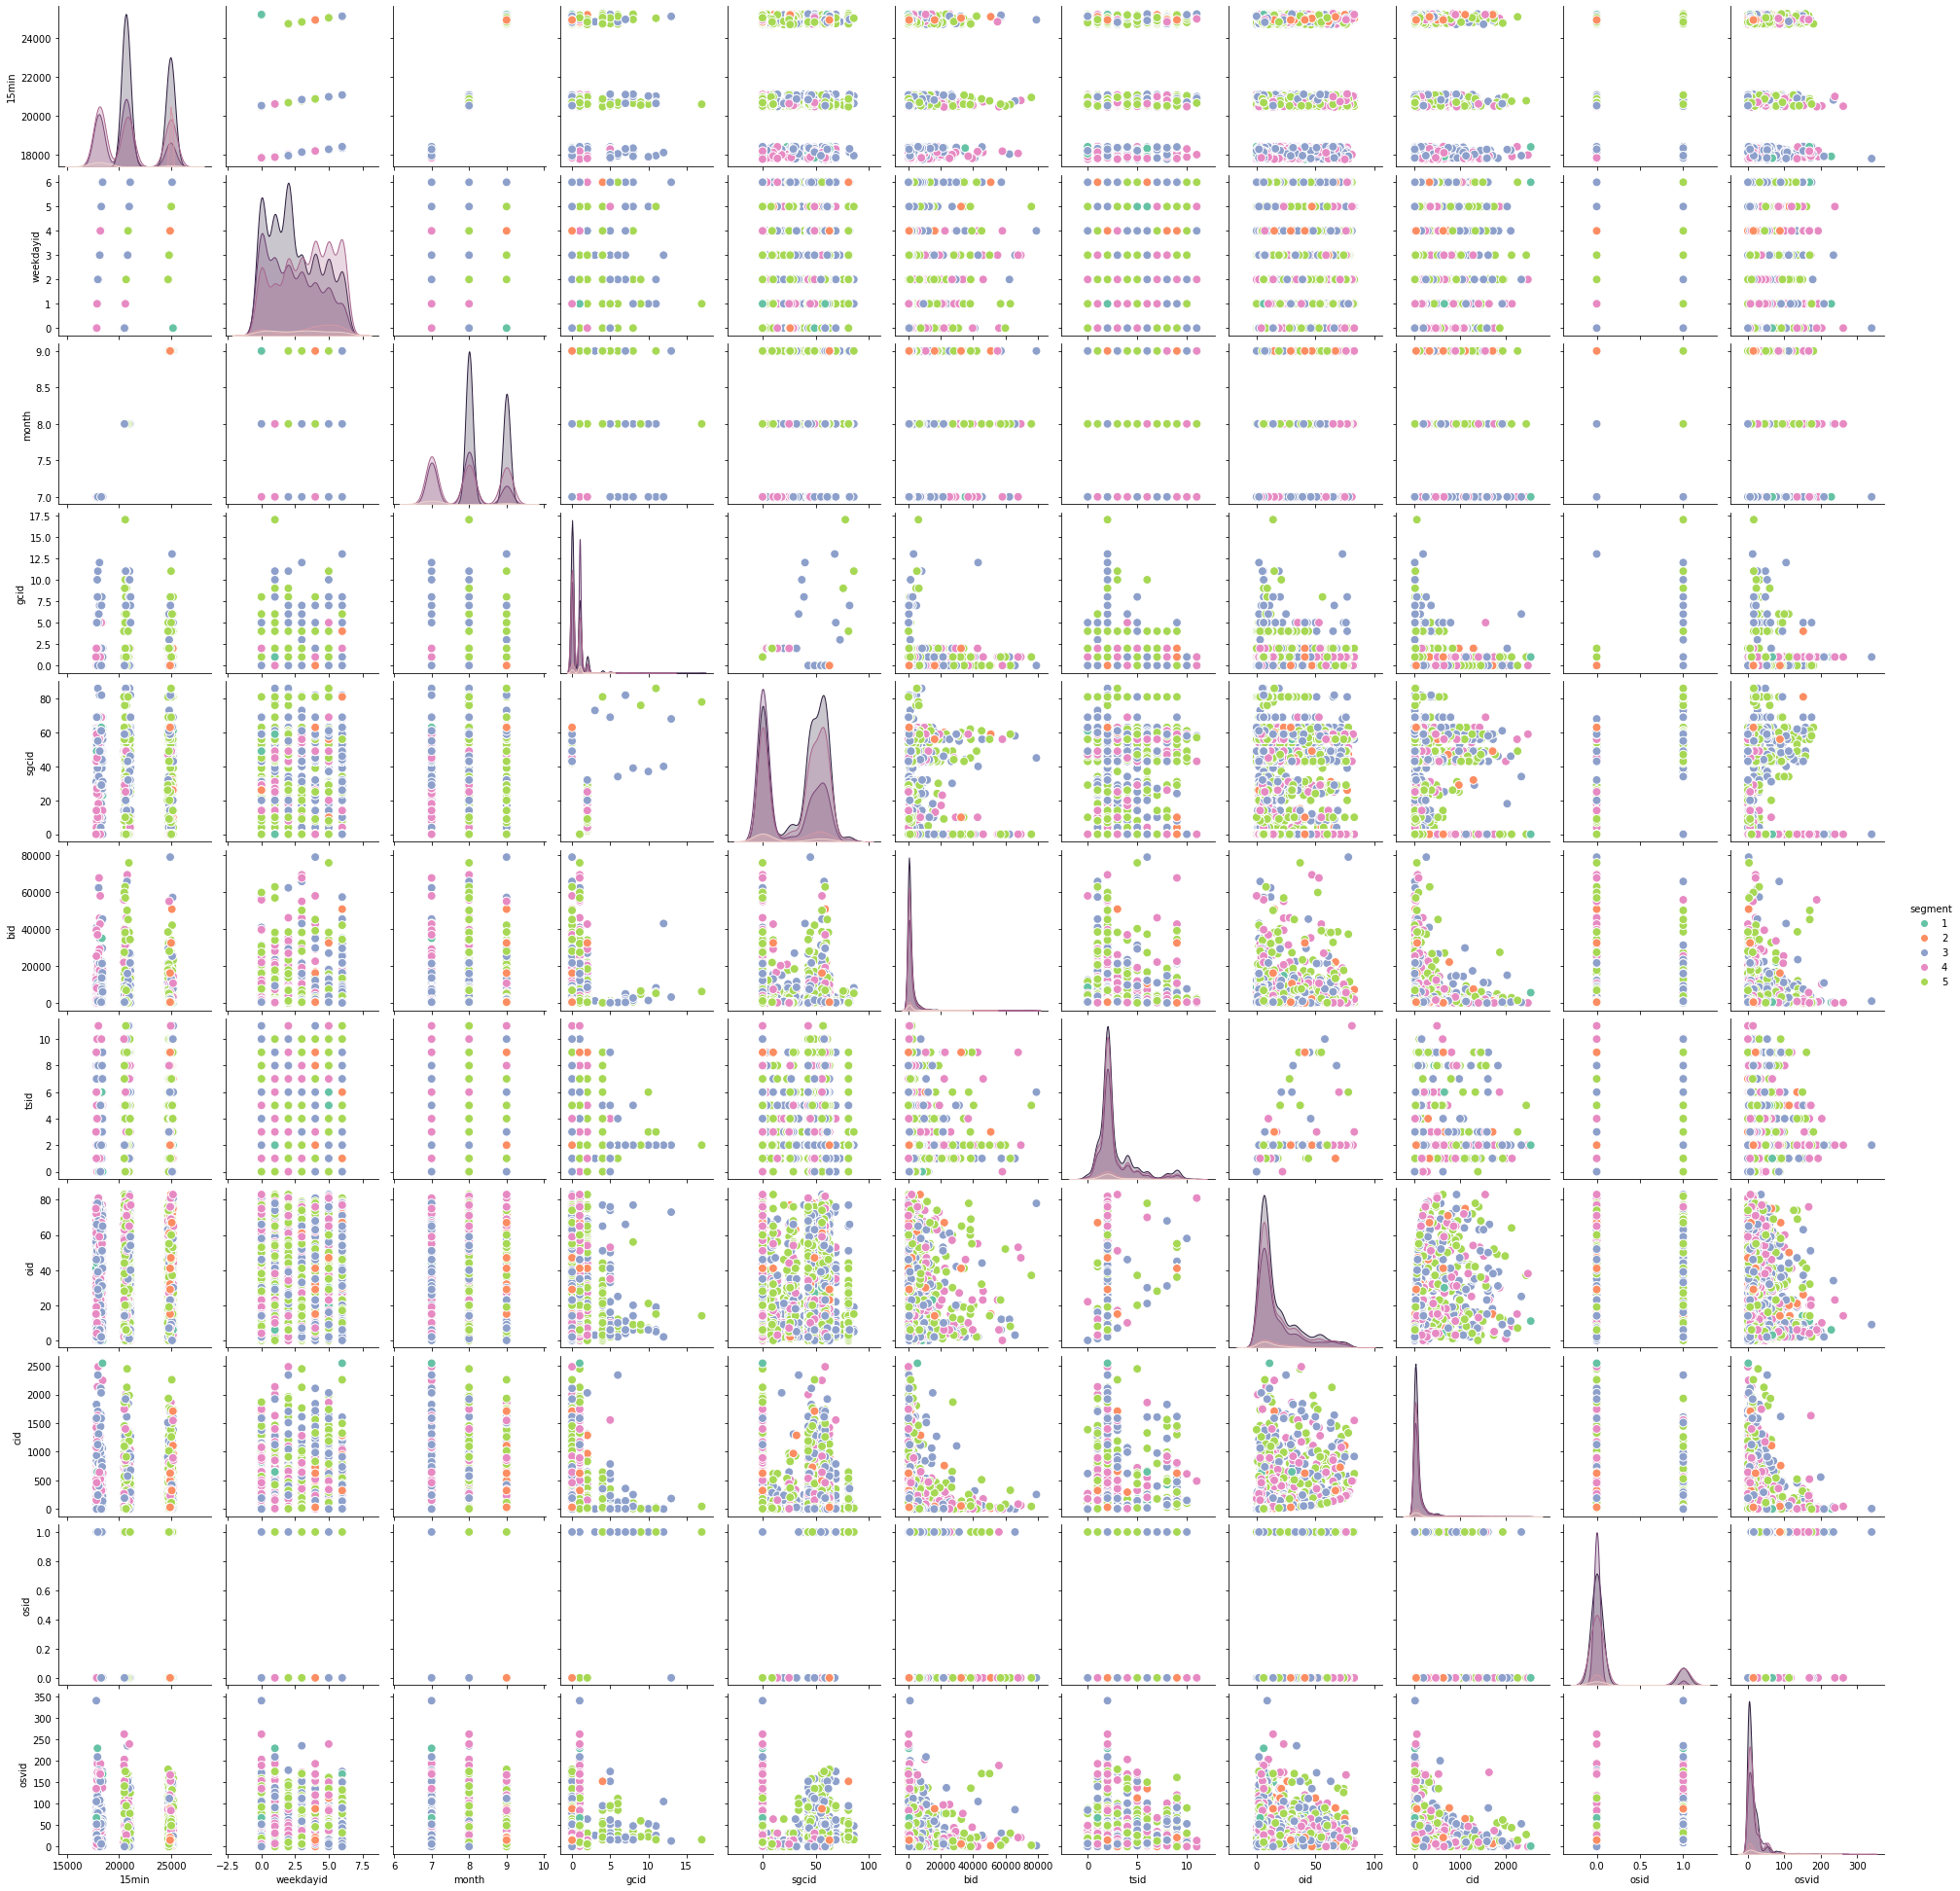

ic| <ipython-input-4-1e7d1bf3d8c8>:6 in <module> at 09:04:39.699


In [177]:
#!c1.8
ic()
my_dpi=96
plt.figure(figsize=(960/my_dpi, 960/my_dpi), dpi=my_dpi)
sns.pairplot(dfr.sample(10000), kind="scatter", hue="segment", plot_kws=dict(s=80, edgecolor="white", linewidth=1, palette='Set2'))
plt.show()
ic()

In [191]:
#!c1.8
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
random_state = 42


In [201]:
#!c1.8
ic()
X = dfr.iloc[:,1:]
y = dfr.iloc[:,0]
ic()

ic| <ipython-input-28-54cbcc555221>:1 in <module> at 10:03:06.925
ic| <ipython-input-28-54cbcc555221>:4 in <module> at 10:03:07.163


In [202]:
#!c1.8
pd.set_option('display.max_rows', 10)
display(X)

,5min,weekdayid,month,gcid,sgcid,bid,tsid,oid,cid,osid,osvid
0,53497,0,7,0,57,0,0,0,0,0,0
1,54847,5,7,1,0,1,1,1,1,0,1
2,62082,2,8,0,45,2,2,2,2,0,2
3,62587,4,8,1,0,3,1,3,3,0,3
4,61592,0,8,1,0,4,2,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...
44854511,62991,5,8,0,59,651,2,9,9,1,53
44854512,61455,0,8,0,56,2734,2,50,76,0,6
44854513,74417,3,9,0,45,700,2,38,49,0,18
44854514,54648,4,7,1,0,49,2,5,31,0,45


In [205]:
#!c1.8
ic()
pd.set_option('display.max_rows', 10)
display(y)
ic()

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

ic| <ipython-input-32-855bfa74c11c>:1 in <module> at 10:05:58.841
ic| <ipython-input-32-855bfa74c11c>:4 in <module> at 10:05:58.863


In [204]:
#!c1.8
ic()
y = label_binarize(y, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]
display(y.shape)
ic()

ic| <ipython-input-31-d65addeac226>:1 in <module> at 10:05:50.743


(44854283, 5)

ic| <ipython-input-31-d65addeac226>:5 in <module> at 10:05:55.451


In [206]:
#!c1.8
ic()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)
ic()

ic| <ipython-input-33-cba075d7eb41>:1 in <module> at 10:06:14.586
ic| <ipython-input-33-cba075d7eb41>:3 in <module> at 10:06:40.992


In [207]:
#!c1.8
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22427141, 11), (22427142, 11), (22427141, 5), (22427142, 5))

In [ ]:
#!c1.8
ic()
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state), n_jobs=4
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
ic()

ic| <ipython-input-37-34db4236ff2d>:1 in <module> at 10:10:15.865


In [ ]:
#!c1.8
